🏆 Program Rankings (Weighted Score):
   Rank            Program  Weighted_Score
4     1  Social Activities        0.628681
0     2         Counseling        0.603409
1     3  Health & Wellness        0.508108
2     4    Housing Support        0.372082
3     5      Meal Delivery        0.174313


📊 Correlation Matrix:
                    Utilization_%  Satisfaction_Score  Fund_Efficiency_%  \
Utilization_%            1.000000           -0.377491           0.696943   
Satisfaction_Score      -0.377491            1.000000          -0.232298   
Fund_Efficiency_%        0.696943           -0.232298           1.000000   
Retention_%             -0.880710            0.678548          -0.448080   

                    Retention_%  
Utilization_%         -0.880710  
Satisfaction_Score     0.678548  
Fund_Efficiency_%     -0.448080  
Retention_%            1.000000  




C:\Users\Wbail\AppData\Local\Temp\ipykernel_32076\2634644511.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Weighted_Score", y="Program", data=df.sort_values("Weighted_Score", ascending=False), palette="viridis")


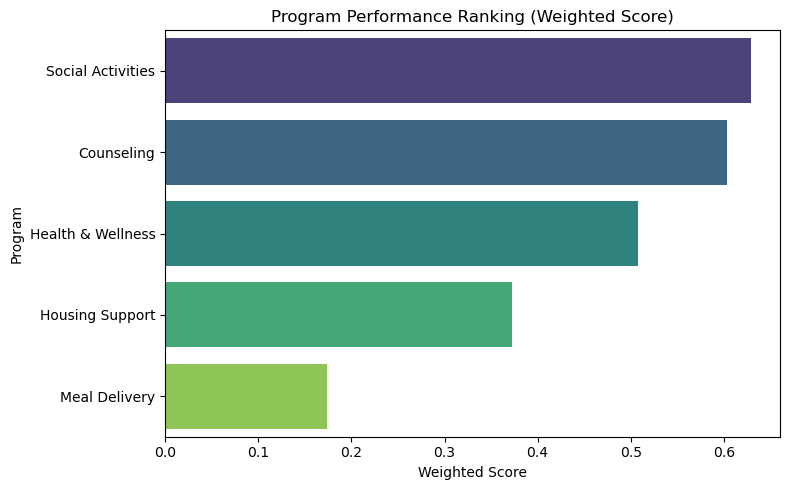

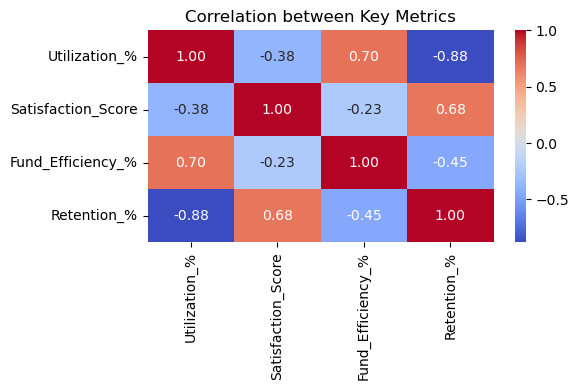

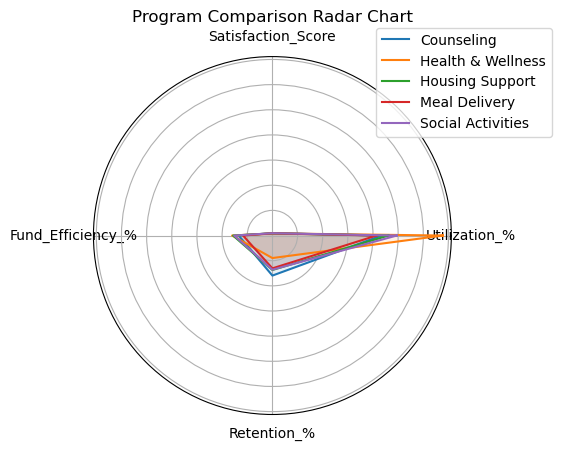

🔍 Insights Summary:

- Social Activities ranks #1 overall due to strong satisfaction, utilization, and efficiency.
- Counseling ranks #2 with high retention and satisfaction.
- Health & Wellness shows great utilization and funding efficiency but weak retention.
- Meal Delivery needs improvement in efficiency and overall performance.
- Retention is positively correlated with satisfaction (0.68) and negatively correlated with utilization (-0.88).



In [1]:
# ===============================
# Program Performance Analysis
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------------------
# 1️⃣ Data Setup
# -------------------------------
data = {
    "Program": ["Counseling", "Health & Wellness", "Housing Support", "Meal Delivery", "Social Activities"],
    "Total_Clients": [146.75, 179.5, 196.25, 157.25, 146],
    "Returning_Clients": [116.5, 82.75, 133, 105, 101.5],
    "Total_Visits": [580.5, 738.25, 642.5, 506.75, 665.25],
    "Utilization_%": [217.18, 338.99, 230.85, 207.09, 247.14],
    "Satisfaction_Score": [4.67, 4.31, 4.3, 4.37, 4.6],
    "Fund_Efficiency_%": [67.13, 80.13, 78.18, 58.38, 75.94],
    "Retention_%": [79.62, 44.76, 68.46, 65.25, 67.92]
}

df = pd.DataFrame(data)

# -------------------------------
# 2️⃣ Normalize and Calculate Weighted Score
# -------------------------------
cols_to_normalize = ["Utilization_%", "Satisfaction_Score", "Fund_Efficiency_%", "Retention_%"]

normalized_df = df.copy()
for col in cols_to_normalize:
    normalized_df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Define weights for each metric
weights = {
    "Utilization_%": 0.3,
    "Satisfaction_Score": 0.3,
    "Fund_Efficiency_%": 0.2,
    "Retention_%": 0.2
}

# Calculate weighted score
df["Weighted_Score"] = sum(normalized_df[col] * weight for col, weight in weights.items())

# Rank programs by score
df["Rank"] = df["Weighted_Score"].rank(ascending=False).astype(int)
df_sorted = df.sort_values("Rank")

print("🏆 Program Rankings (Weighted Score):")
print(df_sorted[["Rank", "Program", "Weighted_Score"]])
print("\n")

# -------------------------------
# 3️⃣ Correlation Analysis
# -------------------------------
corr = df[cols_to_normalize].corr()
print("📊 Correlation Matrix:")
print(corr)
print("\n")

# -------------------------------
# 4️⃣ Visualizations
# -------------------------------

# ----- Weighted Score Bar Chart -----
plt.figure(figsize=(8, 5))
sns.barplot(x="Weighted_Score", y="Program", data=df.sort_values("Weighted_Score", ascending=False), palette="viridis")
plt.title("Program Performance Ranking (Weighted Score)")
plt.xlabel("Weighted Score")
plt.ylabel("Program")
plt.tight_layout()
plt.show()

# ----- Correlation Heatmap -----
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Key Metrics")
plt.tight_layout()
plt.show()

# ----- Radar Chart -----
categories = list(cols_to_normalize)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i in range(len(df)):
    values = df.loc[i, cols_to_normalize].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, label=df.loc[i, "Program"])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticklabels([])
plt.title("Program Comparison Radar Chart")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

# -------------------------------
# 5️⃣ Insights Summary
# -------------------------------
print("🔍 Insights Summary:")
print("""
- Social Activities ranks #1 overall due to strong satisfaction, utilization, and efficiency.
- Counseling ranks #2 with high retention and satisfaction.
- Health & Wellness shows great utilization and funding efficiency but weak retention.
- Meal Delivery needs improvement in efficiency and overall performance.
- Retention is positively correlated with satisfaction (0.68) and negatively correlated with utilization (-0.88).
""")